In [1]:
import numpy as np
import pandas as pd

rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254  # 1/10mm -> inches
inches.shape

(365,)

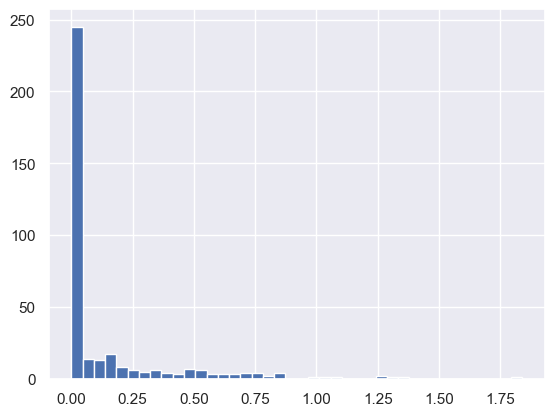

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()  # set plot style
plt.hist(inches, 40);

##### ufunc으로서의 비교연산자

In [3]:
x = np.array([1,2,3,4,5])
x<3

array([ True,  True, False, False, False])

In [4]:
x>3

array([False, False, False,  True,  True])

In [5]:
x <=3

array([ True,  True,  True, False, False])

In [6]:
x >=3

array([False, False,  True,  True,  True])

In [7]:
x!=3

array([ True,  True, False,  True,  True])

In [8]:
(2*x) == (x**2)

array([False,  True, False, False, False])

In [9]:
rng = np.random.RandomState(0)
x = rng.randint(10, size = (3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]], dtype=int32)

In [10]:
x<6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [11]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [12]:
np.count_nonzero(x<6)

8

In [13]:
np.sum(x<6)

np.int64(8)

In [14]:
np.sum(x<6, axis=1)

array([4, 2, 2])

In [15]:
np.any(x>8)

np.True_

In [16]:
np.any(x<0)

np.False_

In [17]:
np.all(x<10)

np.True_

In [18]:
np.all(x==6)

np.False_

In [19]:
np.all(x<8, axis=1)

array([ True, False,  True])

##### 부울 연산자

In [20]:
np.sum((inches > 0.5) & (inches < 1))

np.int64(29)

In [21]:
np.sum(~((inches <= 0.5) | (inches >=1)))

np.int64(29)

In [22]:
print("Number days without rain: ", np.sum(inches == 0))
print("Number days with rain:", np.sum(inches !=0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches:", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:  215
Number days with rain: 150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches: 75


##### 마스크로서의 부울 배열

In [23]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]], dtype=int32)

In [24]:
x<5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [25]:
x[x<5]

array([0, 3, 3, 3, 2, 4], dtype=int32)

In [34]:
# 비가 온 모든 날에 대한 마스크 생성
rainy = (inches > 0)
# 여름에 해당하는 날에 대한 마스크 생성(6월 21일은 172번째 날)

In [28]:
np.arange(365)-172

array([-172, -171, -170, -169, -168, -167, -166, -165, -164, -163, -162,
       -161, -160, -159, -158, -157, -156, -155, -154, -153, -152, -151,
       -150, -149, -148, -147, -146, -145, -144, -143, -142, -141, -140,
       -139, -138, -137, -136, -135, -134, -133, -132, -131, -130, -129,
       -128, -127, -126, -125, -124, -123, -122, -121, -120, -119, -118,
       -117, -116, -115, -114, -113, -112, -111, -110, -109, -108, -107,
       -106, -105, -104, -103, -102, -101, -100,  -99,  -98,  -97,  -96,
        -95,  -94,  -93,  -92,  -91,  -90,  -89,  -88,  -87,  -86,  -85,
        -84,  -83,  -82,  -81,  -80,  -79,  -78,  -77,  -76,  -75,  -74,
        -73,  -72,  -71,  -70,  -69,  -68,  -67,  -66,  -65,  -64,  -63,
        -62,  -61,  -60,  -59,  -58,  -57,  -56,  -55,  -54,  -53,  -52,
        -51,  -50,  -49,  -48,  -47,  -46,  -45,  -44,  -43,  -42,  -41,
        -40,  -39,  -38,  -37,  -36,  -35,  -34,  -33,  -32,  -31,  -30,
        -29,  -28,  -27,  -26,  -25,  -24,  -23,  -

In [ ]:
# summer mask 생성
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 >0)

In [32]:
inches[summer] # 127번째 날부터 127+90 = 217번째 날까지 강수량

array([0.        , 0.        , 0.        , 0.        , 0.07086614,
       0.09055118, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01181102,
       0.75984252, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01968504, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01968504,
       0.5       , 0.8503937 , 0.        , 0.03937008, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.33070866, 0.0511811 ,
       0.        , 0.11811024, 0.        , 0.        , 0.     

In [35]:
print("Median precip on rainy days in 2014 (inches):", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches):", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches): 0.19488188976377951
Median precip on summer days in 2014 (inches): 0.0
Maximum precip on summer days in 2014 (inches): 0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


##### 키워드 and/or vs. 연산자 &/| 사용하기
- and나 or 사용시 전체 객체의 참과 거짓 측정
- &와 |는 각 객체의 비트를 참조

> and나 or를 사용하는 것은 파이썬에 그 객체를 하나의 부울 요소로 취급해달라고 요청하는 것과 마찬가지  
> 파이썬에서 모든 0이 아닌 정수는 다음과 같이 True로 간주한다

In [37]:
bool(42), bool(0)

(True, False)

In [49]:
bool (42 and 0)

False

In [51]:
bool (42 or 0)

True

> &와 |를 정수에 사용할 때 표현식은 그 요소의 비트에 대해 동작하므로 그 숫자를 구성하는 개별 비트에 and와 or를 적용하는 것과 같다

In [40]:
bin(42)

'0b101010'

In [41]:
bin(59)

'0b111011'

In [44]:
bin(42 & 59)

'0b101010'

In [45]:
42 & 59

42

In [46]:
bin (42 | 59)

'0b111011'

In [47]:
42 | 59

59

##### 정리
- and, or : 전체 객체에 대해 단일 부울 평가를 수행 (개별 비트나 바이트에 대해 부울 평가를 수행하려고 하면  Value error가 뜬다) (The truth value of an array with more than one element is ambiguous.)
- &, |: 객체의 내용 (개별 비트나 바이트)에 대해 여러 번 부울 평가를 수행한다. 부울 NumPy 배열에서는 대부분 후자를 선호한다

> NumPy의 부울 배열을 가지고 있다면 이를 1 = True, 0 = False인 비트로 이뤄진 문자열로 생각할 수 있고, &와 |의 결과는 이전과 비슷한 방식으로 동작한다

In [52]:
A = np.array([1,0,1,0,1,0], dtype = bool)
B = np.array([1,1,1,0,1,1], dtype = bool)
A|B

array([ True,  True,  True, False,  True,  True])

> 이 배열에 or를 사용하는 것은 전체 배열 객체의 참이나 거짓을 평가하는 것으로서, 잘 정의된 값은 아니다

In [53]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

- 특정 배열에 부울 표현식을 사용할 때는 or나 and 대신 |나 &을 사용해야 한다.

In [54]:
x = np.arange(10)
(x>4)&(x<8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

- 전체 배열의 참이나 거짓을 평가하려고 하면 Value Error가 발생한다

In [55]:
(x>4) and (x<8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()